Clustering : K-means Clustering, GMM
    ==================

K-Means Clustering
--------

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def main():
    # Iris 데이터 불러오기
    iris = load_iris()
    
    # Iris 데이터 프레임 만들기
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    # 1.KMeans 객체 불러오기
    # Iris 데이터는 3개의 클래스를 가지고 있으므로 3개의 군집으로 나누어줍니다.
    # irisDF를 넣어 군집화를 진행합니다.
    kmeans =KMeans(n_clusters = 3, max_iter = 100, random_state = 0).fit(irisDF)
    
    # 2.군집화 결과를 데이터 프레임에 추가합니다.
    irisDF['cluster'] = kmeans.predict(irisDF)
    irisDF['target'] = iris.target
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    # target과 cluster의 개수에 대해 sepal_length 데이터를 표현합니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
if __name__ == "__main__":
    main()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


Clustering 시각화
--------------

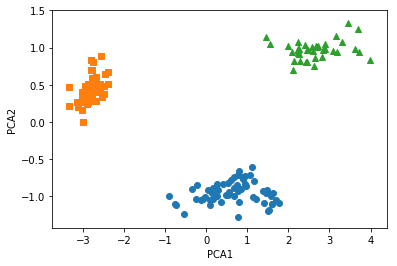

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

def Visualize():
    from sklearn.decomposition import PCA
    
    # 시각화를 위해 PCA로 feature dimension을 2차원으로 감소시켜줍니다.
    # 1.PCA 객체를 불러오고 n_components를 설정합니다.
    pca = PCA(n_components=2).fit(irisDF)
    
    # 2.iris.data를 PCA로 변환시켜줍니다.
    pca_transformed = pca.transform(irisDF)

    # 3.데이터프레임에 차원 축소된 값을 넣어줍니다.
    irisDF['pca_x'] = pca_transformed[:, 0]
    irisDF['pca_y'] = pca_transformed[:, 1]
    
    # 군집된 값이 0, 1, 2 인 경우, 인덱스를 추출합니다.
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index

    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("pictures/k_means_plot.png")
    
def main():
    # 4.Kmeans 객체를 불러오고 fit()을 실행해주세요..
    kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 0).fit(irisDF)
    irisDF['cluster'] = kmeans.predict(irisDF)
    irisDF['target'] = iris.target
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    
    Visualize()
    
if __name__ == "__main__":
    main()

Gaussian Mixture Model(GMM)
---------------

target  gmm_cluster
0       1              50
1       2              50
2       0              50
Name: gmm_cluster, dtype: int64 

target  Kmean_cluster
0       0                50
1       2                50
2       1                50
Name: Kmean_cluster, dtype: int64


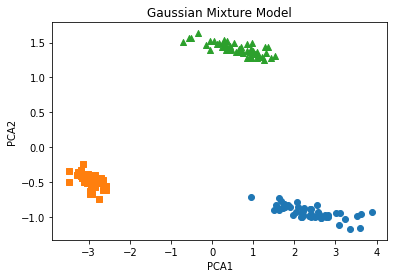

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
feature_names = iris.feature_names
iris_df = pd.DataFrame(data =iris.data, columns = feature_names)
iris_df['target'] = iris.target

def Visualize():
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(iris_df)

    iris_df['pca_x'] = pca_transformed[:,0]
    iris_df['pca_y'] = pca_transformed[:,1]


    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = iris_df[iris_df['gmm_cluster'] == 0].index
    idx_1 = iris_df[iris_df['gmm_cluster'] == 1].index
    idx_2 = iris_df[iris_df['gmm_cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=iris_df.loc[idx_0, 'pca_x'], y= iris_df.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=iris_df.loc[idx_1, 'pca_x'], y= iris_df.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=iris_df.loc[idx_2, 'pca_x'], y= iris_df.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('Gaussian Mixture Model')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("pictures/gmm_plot.png")
    
def main():
	# 1.Gaussian Mixture Model 불러오기 및 학습
    gmm = GaussianMixture(n_components=3).fit(iris_df)
    # 2.predict 값 출력
    gmm_cluster_labels = gmm.predict(iris_df)
    
    # 3.DataFrame에 예측 값 넣기
    iris_df['gmm_cluster'] = gmm_cluster_labels
    
    # 결과 출력
    iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
    print(iris_result,'\n')
    
    # 4.Kmeans 불러오기 및 학습
    kmeans = KMeans(n_clusters = 3, max_iter=100, random_state=100).fit(iris_df)
    # 5.predict 값 출력
    kmeans_cluster_labels = kmeans.predict(iris_df)
    
    # 6.DataFrame에 예측 값 넣기
    iris_df['Kmean_cluster'] = kmeans_cluster_labels
    iris_result = iris_df.groupby(['target'])['Kmean_cluster'].value_counts()
    print(iris_result)
    
    Visualize()
    
if __name__ == "__main__":
    main()

K-means VS GMM
----------------

K-means Clustering
target  kmeans_label
0       2               67
        0               31
        1                2
1       1               97
        2                3
2       0               67
        2               33
Name: kmeans_label, dtype: int64
Gaussian Mixture Model
target  gmm_label
0       2            100
1       1             98
        2              2
2       0             92
        2              8
Name: gmm_label, dtype: int64


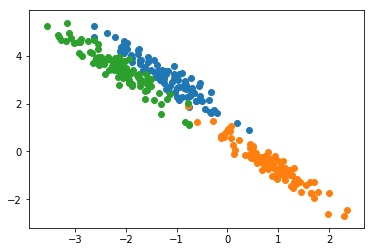

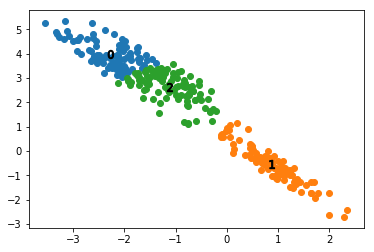

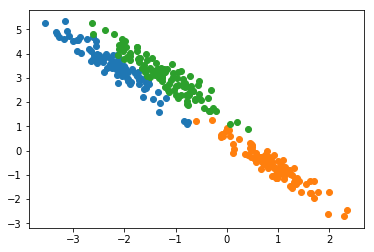

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples = 300, n_features =2, centers =3, cluster_std = 0.8, random_state=0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
    fig.savefig("pictures/data_plot.png")
    
# K-Means Clustering
def K_means():
    # K-means
    k_means = KMeans(n_clusters = 3, random_state = 0) # KMeans clustering
    kmeans_label = k_means.fit_predict(X_aniso)         # 학습 및 예측
    clusterDF['kmeans_label']=kmeans_label             # 데이터프레임에 결과값 저장
    
    # Kmeans 군집의 중심값을 뽑아보세요.
    center = k_means.cluster_centers_                   # 군집별 중심값 추출
    
    # KMeans 군집 결과 시각화
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    fig.savefig("pictures/k_means2_plot.png")

    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())

def GMM():
    # GMM Clutering
    gmm = GaussianMixture(n_components=3, random_state=0)   # GMM 불러오기
    gmm_label = gmm.fit(X_aniso).predict(X_aniso)           # 학습과 결과 예측
    clusterDF['gmm_label']=gmm_label                        # 예측 label 데이터프레임에 입력
    unique_labels = np.unique(gmm_label)
    
    # GMM Clustering 시각화
    fig, ax = plt.subplots()
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    fig.savefig("pictures/gmm2_plot.png")
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()

End to End Clustering
-------------

       ftr1      ftr2      ftr3      ftr4      ftr5      pca_x      pca_y  \
0 -8.591595  7.406348 -2.984199 -3.996588  4.235865  -3.653929  -7.439308   
1 -6.900332  8.692419 -2.531820 -2.685917  4.998194  -3.001309  -5.944653   
2  8.462535  9.803245  2.561731  3.103243 -2.018894   5.989978  10.116474   
3 -6.116245  0.667682  8.687246  1.017335  4.999412  10.422832  -8.529236   
4 -6.072788  8.422612 -2.909074 -0.857638  5.410820  -2.569463  -5.371390   

   target  Kmean_label  
0       2            2  
1       2            2  
2       0            3  
3       3            0  
4       2            2  


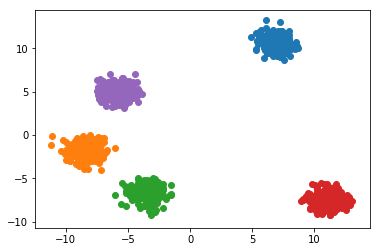

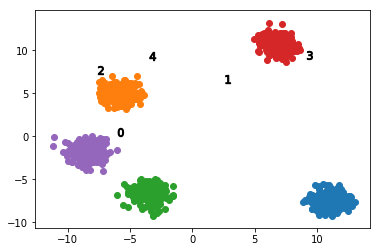

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# make_blob() 인자
# 1.n_samples = 1000, n_features = 5, centers = 5, cluster_std = 0.8, random_state = np.random.seed()
n_samples = 1000
n_features = 5
centers = 5
cluster_std = 0.8

# pca component
# 2.차원을 2개로 축소해보세요.
n_components = 2

# 3.K-mean 인자 설정
n_clusters = 5
max_iter = 100

# 4.make_blob() 함수를 이용해서 임의의 데이터를 생성해보세요.
x, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)

# 생성한 데이터로 데이터 프레임을 만들어보세요.
# 5.Columns = ['ftr1','ftr2','ftr3','ftr4','ftr5']
cluster_df = pd.DataFrame(data = x, columns = ['ftr1','ftr2','ftr3','ftr4','ftr5'])

# PCA를 사용해서 5개의 Feature를 2개의 Feature로 Dimension Reduction하세요.
# 축소된 PCA 값을 데이터 프레임에 추가해주세요 (column 명 : pca_x, pca_y)
# 6.y 값을 'target' columns에 만들어 넣어주세요.
pca = PCA(n_components=2).fit(cluster_df)
x_reduction = pca.transform(cluster_df)

# 7.데이터 프레임에 pca 데이터와 y 데이터를 추가해보세요.
cluster_df['pca_x'] = x_reduction[:, 0]
cluster_df['pca_y'] = x_reduction[:, 1]
cluster_df['target'] = y


# 8.Kmean 수행
kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=100).fit(cluster_df)
cluster_labels = kmeans.predict(cluster_df)
cluster_df['Kmean_label'] = cluster_labels

print(cluster_df.head())


# 인자는 DF, target, feature1, feature2, center 여부 입니다.
def visualize(DF, target, feature1, feature2, center):
    # Center는 bool 값으로 받습니다.
    # Center를 찍을 경우
    fig, ax = plt.subplots()
    if center == True:
        center_val = kmeans.cluster_centers_
    label_list = np.unique(DF[target])
    for label in label_list:
        label_cluster = DF[DF[target] == label]
        ax.scatter(x = label_cluster[feature1], y = label_cluster[feature2])

        if center == True:
            center_x_y = center_val[label]
            ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    fig.savefig("pictures/endtoend_clustering_plot.png")

visualize(cluster_df, 'target', 'pca_x','pca_y', False)
visualize(cluster_df, 'Kmean_label', 'pca_x','pca_y', True)